In [11]:
pip install pydub


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\l3ics\SDI\PDI\env_pdi\Scripts\python.exe -m pip install --upgrade pip' command.


In [13]:
pip install simpleaudio


You should consider upgrading via the 'c:\Users\l3ics\SDI\PDI\env_pdi\Scripts\python.exe -m pip install --upgrade pip' command.


In [14]:

import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
from mpl_toolkits.mplot3d import Axes3D
from pydub import AudioSegment
import simpleaudio as sa

In [3]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [4]:
#
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [5]:
# 
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [6]:
#
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 


In [7]:
#
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([lh, rh, pose, face])

In [19]:
audio = 'Audio'  # Assurez-vous que 'Audio' est le bon chemin relatif par rapport à votre script

list  = os.listdir(audio)
print(list)

['bip_signal.mp3']


In [23]:
from pydub.generators import Sine

# Fréquence du bip (en Hz)
frequency = 1000

# Durée du bip (en millisecondes)
duration = 1000

# Générer le bip
bip = Sine(frequency).to_audio_segment(duration=duration)

# Sauvegarder le fichier audio
bip.export(os.path.join(audio_directory, "bip_signal2.mp3"), format="mp3")


FileNotFoundError: [WinError 2] Le fichier spécifié est introuvable

In [9]:


# Fonction pour jouer un signal sonore
def play_audio_signal():
    # Charger le fichier audio du signal sonore
    audio_signal = AudioSegment.from_file("path/to/audio_signal.mp3", format="mp3")
    
    # Jouer le signal sonore
    play_obj = sa.play_buffer(audio_signal.raw_data, num_channels=1, bytes_per_sample=audio_signal.sample_width,
                              sample_rate=audio_signal.frame_rate)
    
    # Attendre la fin de la lecture
    play_obj.wait_done()

# Fonction pour capturer la vidéo et mesurer le FPS
def get_fps():
    cap = cv2.VideoCapture(0)
    start_time = time.time()
    frames = 0

    # Jouer le signal sonore pour démarrer
    play_audio_signal()

    while True:
        ret, frame = cap.read()
        frames += 1

        cv2.imshow('Webcam Feed', frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    end_time = time.time()
    elapsed_time = end_time - start_time
    fps = frames / elapsed_time

    print(f'Frames captured: {frames}')
    print(f'Elapsed time: {elapsed_time} seconds')
    print(f'Frames per second (FPS): {fps}')

    cap.release()
    cv2.destroyAllWindows()

# Appeler la fonction pour mesurer le FPS
get_fps()


Frames captured: 699
Elapsed time: 23.537084579467773 seconds
Frames per second (FPS): 29.697815701854694


In [8]:
#acquisition de la vidéo à 30 images par seconde

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        
        for sequence in range(start_folder, start_folder + no_sequences):
            sign = np.zeros((1662,30))
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(1000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW
                    
                sign[:,frame_num] = extract_keypoints(results)
                # NEW Export keypoints
                #keypoints = extract_keypoints(results)
                #npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                #np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
            npy_path = os.path.join(DATA_PATH, action, str(sequence))
            np.save(npy_path, sign)
    start_folder += no_sequences
    cap.release()
    cv2.destroyAllWindows()

KeyboardInterrupt: 

In [ ]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    # Read feed
    ret, frame = cap.read()

    # Make detections
    image, results = mediapipe_detection(frame, holistic)

    # Draw landmarks
    draw_styled_landmarks(image, results)

In [35]:

if video.shape[1]%3 != 0:
    print("landmarks shape not divisible by 3")
row = video.shape[0]
col = int(video.shape[1]/3)
videoX = np.zeros((row, col))
videoY = np.zeros((row, col))
videoZ = np.zeros((row, col))
for column in range(0, video.shape[1], 3):
    videoX[:, column//3] = video[:, column]  # x coordinates
for column in range(1, video.shape[1], 3):
    videoY[:, column//3] = video[:, column]  # y coordinates
for column in range(2, video.shape[1], 3):
    videoZ[:, column//3] = video[:, column]  # z coordinates

print(videoX.shape, videoY.shape, videoZ.shape) # (30, 554) (30, 554) (30, 554)
tensor = np.concatenate((videoX[:, :, np.newaxis], videoY[:, :, np.newaxis], videoZ[:, :, np.newaxis]), axis=2)

print(tensor) # (30, 554, 3)


(30, 1662)
(30, 554) (30, 554) (30, 554)
(30, 554, 3)
[[[ 0.48744208  0.46994352 -0.62944651]
  [ 0.99969822  0.5060302   0.41382661]
  [-0.59935141  0.99932259  0.52053243]
  ...
  [ 0.10143153  0.22725797 -0.01746526]
  [ 0.11048115  0.19941382 -0.02010217]
  [ 0.11928873  0.17676423 -0.02175879]]

 [[ 0.46969566  0.48396739 -0.68941158]
  [ 0.99970728  0.48635656  0.4349643 ]
  [-0.65009576  0.99933559  0.50035059]
  ...
  [ 0.1990798   0.78974849 -0.0386118 ]
  [ 0.22008249  0.78545612 -0.04225859]
  [ 0.23995493  0.7835055  -0.0441889 ]]

 [[ 0.46248728  0.4873901  -0.71121562]
  [ 0.99969488  0.47804752  0.43914604]
  [-0.66972232  0.99929839  0.49238101]
  ...
  [ 0.19608819  0.77601182 -0.03527095]
  [ 0.21621153  0.77213222 -0.0370308 ]
  [ 0.23489052  0.77310342 -0.03701932]]

 ...

 [[ 0.4689911   0.55364484 -0.6002869 ]
  [ 0.9994874   0.48685104  0.51010555]
  [-0.57106745  0.99897581  0.50164878]
  ...
  [ 0.10482614  0.32031837 -0.01405956]
  [ 0.11067515  0.2985813  -0.

In [8]:
sequence_path = os.path.join('Data', 'hello', "2.npy")
video = np.load(sequence_path).T
print(video.shape)
tensor2 = np.reshape(video, (30, 554, 3))
print(tensor2.shape) # (30, 554, 3

(30, 1662)
(30, 554, 3)


In [38]:
sequence_path = os.path.join('Data', 'hello', "2.npy")
video = np.load(sequence_path).T
print(video.shape)
if video.shape[1]%3 != 0:
    print("landmarks shape not divisible by 3")
row = video.shape[0]
col = int(video.shape[1]/3)
videoX = video[:, :col] # x coordinates
videoY = video[:, col:2*col] # y coordinates
videoZ = video[:, 2*col:] # z coordinates

print(videoX.shape, videoY.shape, videoZ.shape) # (30, 554) (30, 554) (30, 554)
tensor = np.concatenate((videoX[:, :, np.newaxis], videoY[:, :, np.newaxis], videoZ[:, :, np.newaxis]), axis=2)

print(tensor2[:, 0, 1]) # (30, 554, 3)


(30, 1662)
(30, 554) (30, 554) (30, 554)
[0.46994352 0.48396739 0.4873901  0.50450689 0.50633395 0.51975572
 0.52646488 0.52954459 0.53528374 0.5429216  0.54392552 0.544788
 0.54653478 0.54816234 0.54989988 0.55135119 0.55053926 0.55003351
 0.54994845 0.54982305 0.54978973 0.55026317 0.55285567 0.55283189
 0.55372226 0.55359334 0.5535053  0.55364484 0.55309904 0.55331963]


In [11]:


def visualize_tensor(tensor):
    num_frames, num_landmarks, _ = tensor.shape

    # Créez une nouvelle figure 3D
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Parcourez chaque landmark
    for landmark in range(num_landmarks):
        # Récupérez les coordonnées X, Y et Z pour le landmark
        x = tensor[:, landmark, 0]
        y = tensor[:, landmark, 1]
        z = tensor[:, landmark, 2]

        # Tracez la trajectoire dans l'espace 3D
        ax.plot(x, y, z, label=f'Landmark {landmark + 1}')

    # Ajoutez des étiquettes et une légende
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Trajectoire des landmarks 3D')
    ax.legend()

    # Affichez la figure
    plt.show()




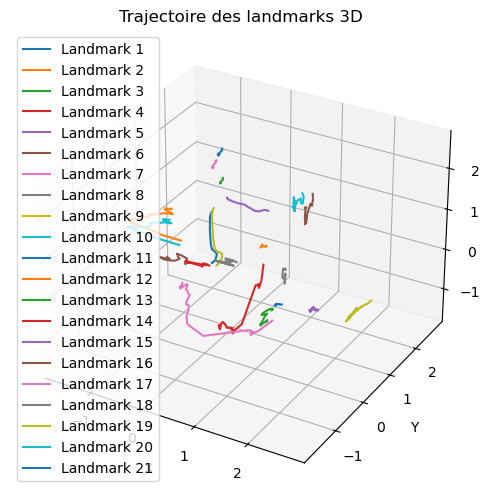

In [6]:
# Utilisez la fonction pour visualiser votre tensor
visualize_tensor(tensor[:, 21:42,:])

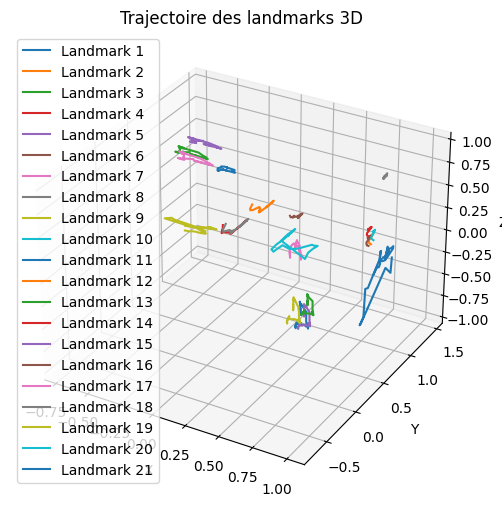

In [34]:
# Utilisez la fonction pour visualiser votre tensor
visualize_tensor(tensor2[:, :21,:])

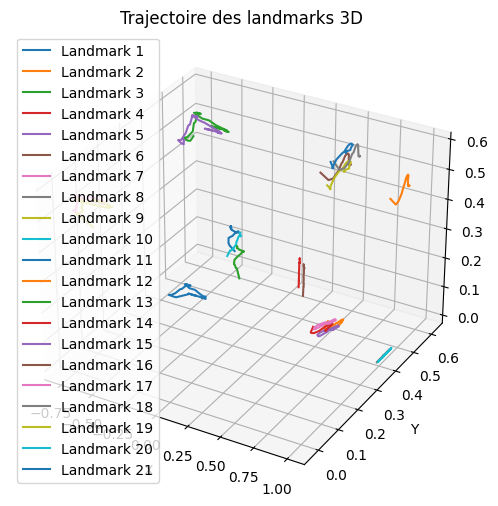

In [27]:
# Utilisez la fonction pour visualiser votre tensor
visualize_tensor(tensor[:, :21,:])

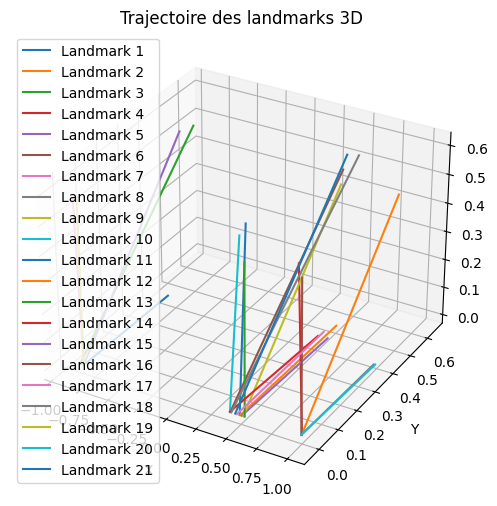

In [24]:
# Utilisez la fonction pour visualiser votre tensor
visualize_tensor(tensor[:2, :21,:])